In [96]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from IPython.display import display
from IPython.display import Image
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

from jupyter_jsmol import JsmolView
from jupyter_jsmol.pymatgen import quick_view

# Récupération de la structure de ZrSiPd

In [97]:
key = "cBffMzOkc37GR0iu9dXW"
material = "mp-961661"
material_name = "ZrSiPd"
with MPRester(key) as m:
    
    #La ligne suivante permet d étudier la cellule primitive 
    #struct = m.get_structure_by_material_id(material)
    
    #Pour étudier la cellule conventionnelle, il faut mettre en commentaire la ligne précédente et retirer le commentaire de la suivante
    struct = m.get_structure_by_material_id(material,conventional_unit_cell=True)
    
    w = CifWriter(struct)
    w.write_file(material+".cif") 
    print("Il suffit de cliquer sur le lien pour télécharger le fichier .CIF de la cellule conventionnelle.")
    display(FileLink(material+".cif"))
    
    
    

Il suffit de cliquer sur le lien pour télécharger le fichier .CIF de la cellule conventionnelle.


/home/users/p/f/pfranqui/mp-961661.cif

In [99]:
#Récupération de toutes les symétries du matériau 

sym = SpacegroupAnalyzer(struct).get_symmetry_operations()

#print(len(sym)) #pour afficher le nombre de symétries totale
#print(sym) #pour afficher toutes les matrices de symétrie


La structure cristalline utilisée est le ZrSiPd. Elle possède 96 éléments de symétrie dans sa cellule conventionnelle. Nous étudierons trois éléments de symétrie différents sur un atome différent à chaque fois. 

In [100]:
#Affichage de tous les noeuds du système cristallin conventionnelle 

print(struct)

Full Formula (Zr4 Si4 Pd4)
Reduced Formula: ZrSiPd
abc   :   6.114316   6.114316   6.114316
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Zr    0.5   0     0
  1  Zr    0.5   0.5   0.5
  2  Zr    0     0     0.5
  3  Zr    0     0.5   0
  4  Si    0     0     0
  5  Si    0     0.5   0.5
  6  Si    0.5   0     0.5
  7  Si    0.5   0.5   0
  8  Pd    0.25  0.25  0.25
  9  Pd    0.25  0.75  0.75
 10  Pd    0.75  0.25  0.75
 11  Pd    0.75  0.75  0.25


# Première symétrie : Réflexion

Position initiale de l'atome de Zr : [0.5 0.  0. ]

Position finale (après réflexion) de l'atome de Zr : [ 0.  -0.5  0. ]

La matrice de réflexion associée à l'opération de symétrie est: 
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]

Le vecteur de translation associé à l'opération de symétrie est:
[0. 0. 0.]


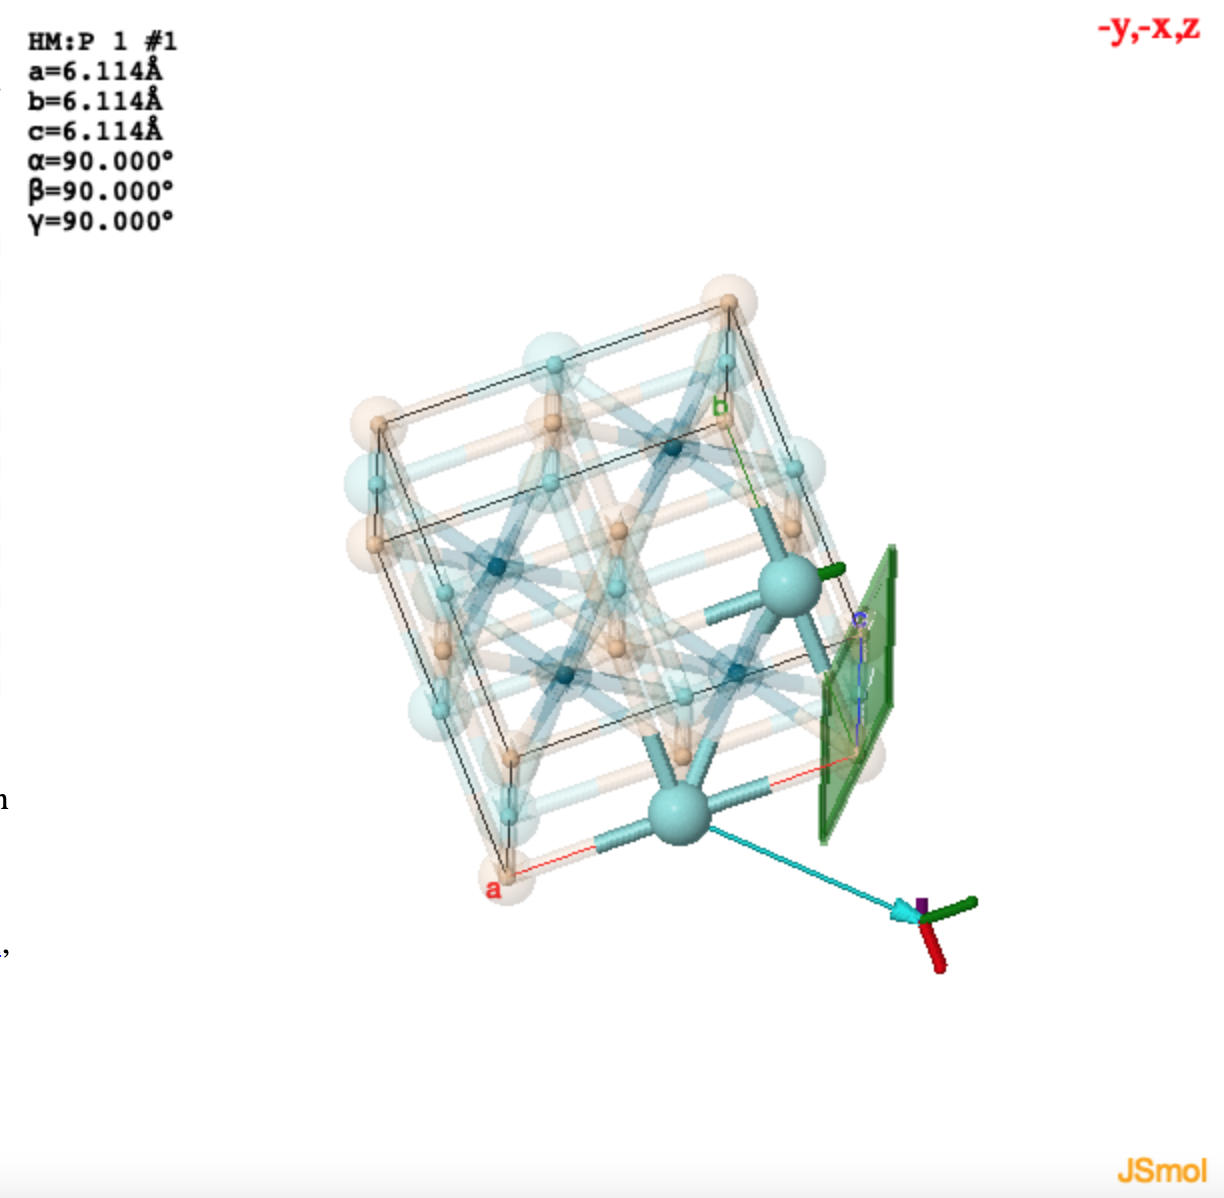

In [101]:
sym1 = SymmOp.from_xyz_string('-y,-x,z')

#Atome de Zr considéré 
position = struct.sites[0].frac_coords
print("Position initiale de l'atome de Zr : " + str(position) + "\n")

#Aplication de la symétrie de réflexion 
result = sym1.operate(position)
print("Position finale (après réflexion) de l'atome de Zr : " + str(result))

print("\nLa matrice de réflexion associée à l'opération de symétrie est: ")
print(sym1.rotation_matrix)

print("\nLe vecteur de translation associé à l'opération de symétrie est:")
print(sym1.translation_vector)

display(Image(filename='sym1.png'))

## Remarques 

La réflexion est une opération de deuxième espèce qui inverse la chiralité, a donc un déterminant de la matrice associée égale à -1. Cette réflexion se fait par rapport à un plan miroir, il est représenté par le plan en vert. Notons que la coordonnée selon l'axe c n'a pas été modifié. 

L'équation de la réflexion dans ce cas-ci est :

$$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & 1\end{bmatrix} \begin{bmatrix} x \\ y \\ z\end{bmatrix} = \begin{bmatrix} -y \\ -x \\ z \end{bmatrix} $$

# Deuxième symétrie : Rotation d'ordre 2

Position initiale de l'atome de Si : [0.  0.5 0.5]

Position finale (après rotation d'ordre 2) de l'atome de Si : [ 0.   0.5 -0.5]

La matrice de rotation associée à l'opération de symétrie est: 
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]

Le vecteur de translation associé à l'opération de symétrie est:
[0. 0. 0.]


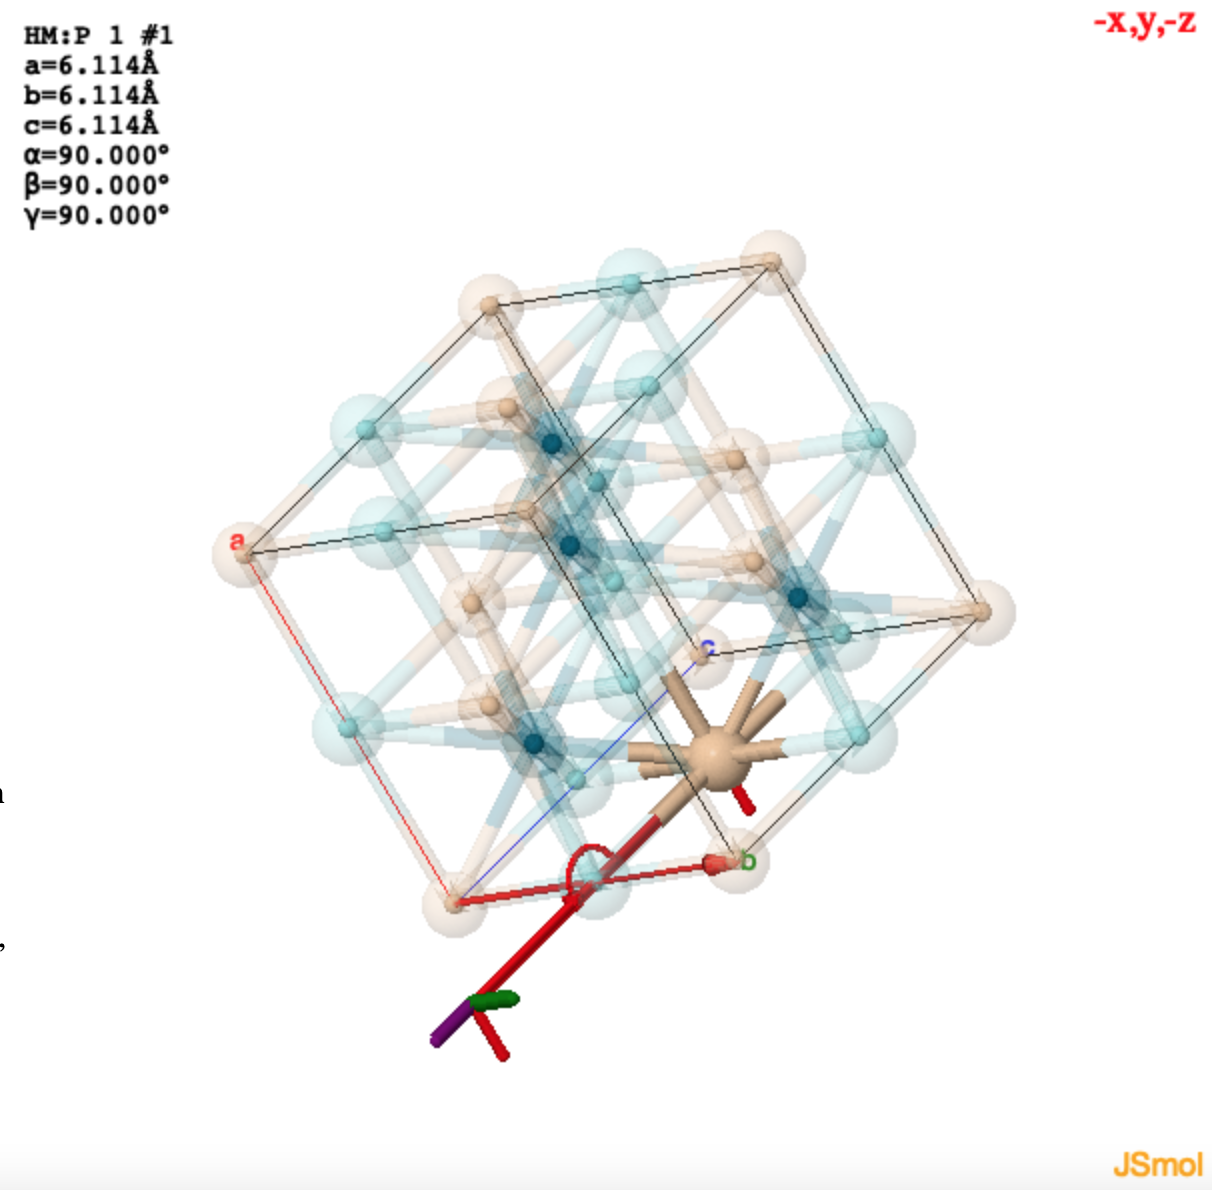

In [103]:
sym2 = SymmOp.from_xyz_string('-x,y,-z')

#Atome de Si considéré 
position = struct.sites[5].frac_coords
print("Position initiale de l'atome de Si : " + str(position) + "\n")

#Aplication de la symétrie de réflexion 
result = sym2.operate(position)
print("Position finale (après rotation d'ordre 2) de l'atome de Si : " + str(result))

print("\nLa matrice de rotation associée à l'opération de symétrie est: ")
print(sym2.rotation_matrix)

print("\nLe vecteur de translation associé à l'opération de symétrie est:")
print(sym2.translation_vector)

display(Image(filename='sym2.png'))

## Remarques

La rotation d'ordre 2 est une opération qui effectue une rotation de 180° autour d'un axe (ici le vecteur b). Notons que la coordonnée selon l'axe b n'a pas été modifié.

L'équation de la rotation d'ordre deux est dans ce cas-ci:

$$\begin{pmatrix} -1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1\end{pmatrix} \begin{pmatrix} x \\ y \\ z\end{pmatrix} = \begin{pmatrix} -x \\ y \\ -z \end{pmatrix} $$

# Troisième symétrie : Roto-inversion

Position initiale de l'atome de Pd : [0.25 0.75 0.75]

Position finale (après roto-inversion) de l'atome de Pd : [ 0.75 -0.25 -0.75]

La matrice de rotation associée à l'opération de symétrie est: 
[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0. -1.]]

Le vecteur de translation associé à l'opération de symétrie est:
[0. 0. 0.]


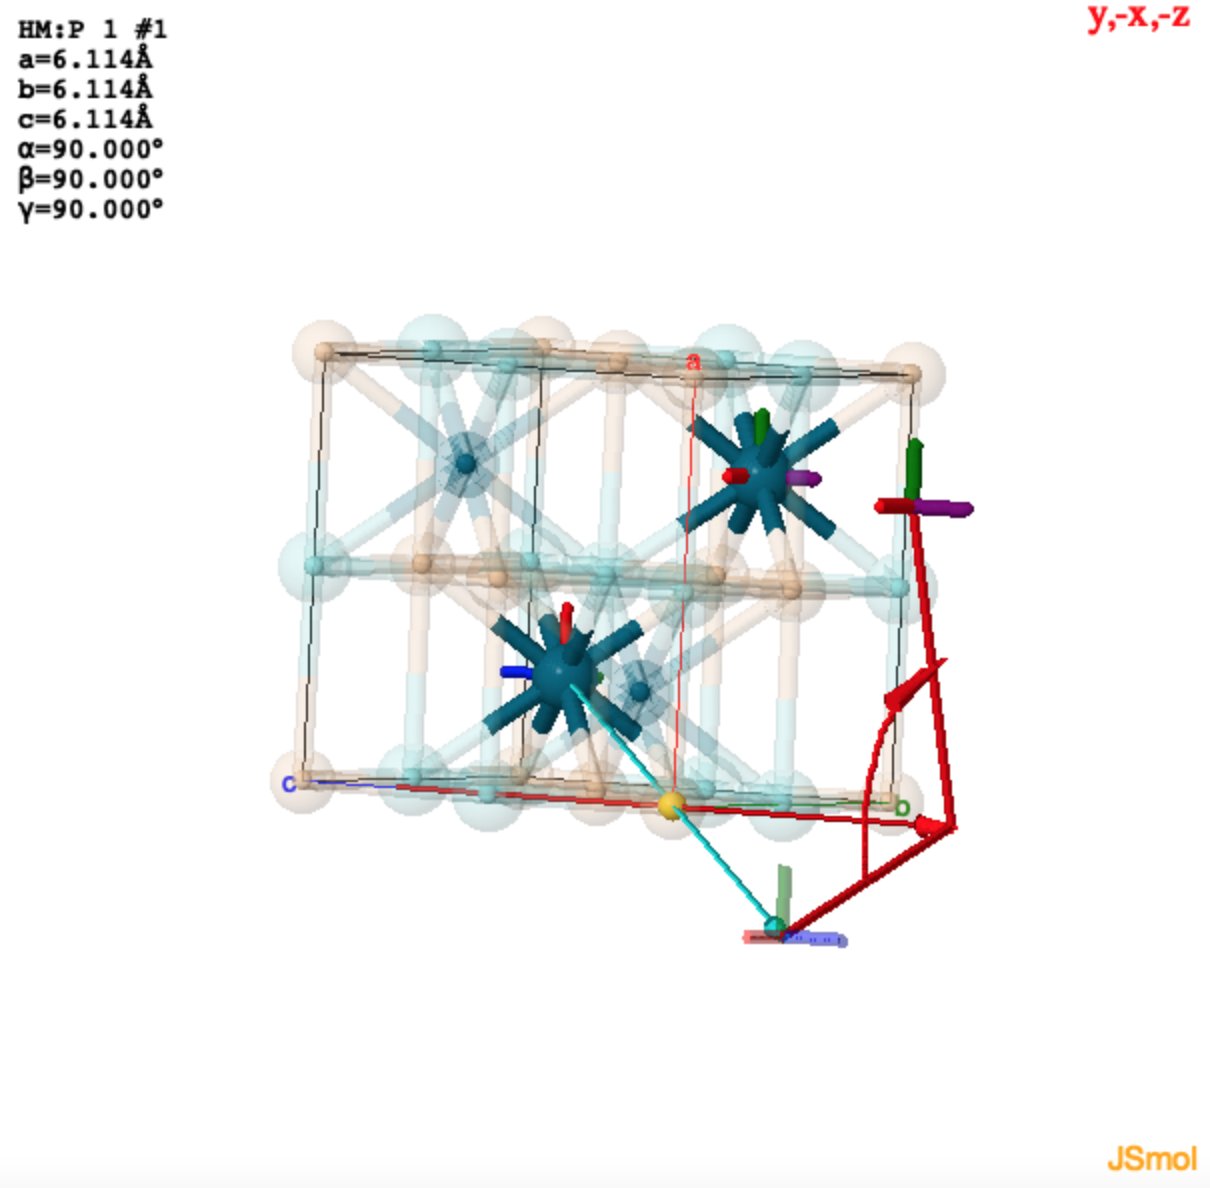

In [104]:
sym3 = SymmOp.from_xyz_string('y,-x,-z')

#Atome de Pd considéré 
position = struct.sites[9].frac_coords
print("Position initiale de l'atome de Pd : " + str(position) + "\n")

#Aplication de la symétrie de réflexion 
result = sym3.operate(position)
print("Position finale (après roto-inversion) de l'atome de Pd : " + str(result))

print("\nLa matrice de rotation associée à l'opération de symétrie est: ")
print(sym3.rotation_matrix)

print("\nLe vecteur de translation associé à l'opération de symétrie est:")
print(sym3.translation_vector)

display(Image(filename='sym3.png'))

## Remarques 

La roto-inversion est une une opération de deuxième espèce qui inverse la chiralité, a donc un déterminant de la matrice associée égale à -1. Cette opération conbine une rotation autour d'un axe avec une inversion. 

L'équation de la roto-inversion est dans ce cas-ci :

$$\begin{pmatrix} 0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & -1\end{pmatrix} \begin{pmatrix} x \\ y \\ z\end{pmatrix} = \begin{pmatrix} y \\ -x \\ -z \end{pmatrix} $$